In [2]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

График мощности критерия для 13 задачи

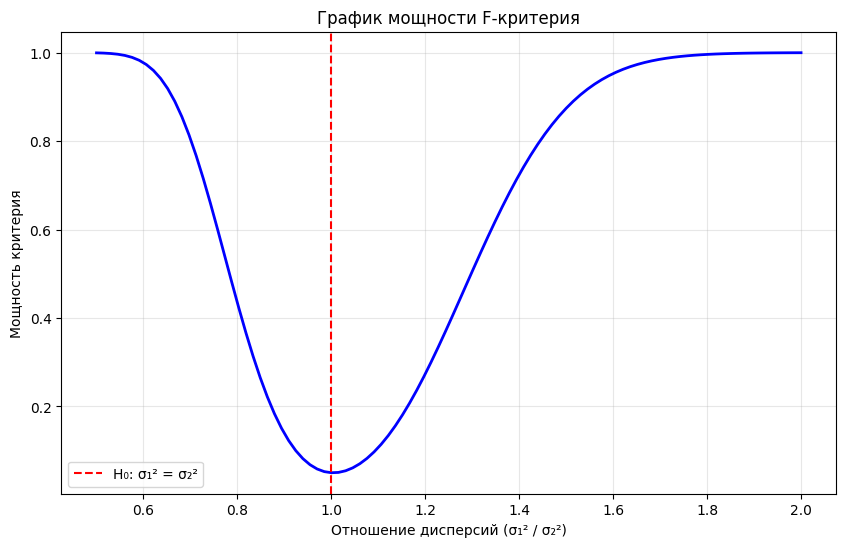

In [ ]:
#поменяла местами выборки для европейцев и египтян
n = 1000  # европейцы
m = 139   # египтяне
alpha = 0.05 

F_low = stats.f.ppf(alpha / 2, dfn=n - 1, dfd=m - 1)
F_high = stats.f.ppf(1 - alpha / 2, dfn=n - 1, dfd=m - 1)

def power_function(ratio):
    # Вероятность отвергнуть H0
    power = (stats.f.cdf(F_low / ratio, dfn=n - 1, dfd=m - 1) + 
            (1 - stats.f.cdf(F_high / ratio, dfn=n - 1, dfd=m - 1)))
    return power

ratio_range = np.linspace(0.5, 2.0, 100)  # Диапазон отношений дисперсий
power_values = [power_function(ratio) for ratio in ratio_range]

plt.figure(figsize=(10, 6))
plt.plot(ratio_range, power_values, color='blue', linewidth=2)
plt.axvline(x=1, color='red', linestyle='--', label='H₀: σ₁² = σ₂²')
plt.xlabel('Отношение дисперсий (σ₁² / σ₂²)')
plt.ylabel('Мощность критерия')
plt.title('График мощности F-критерия')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()


График мощности критерия для 14 задачи

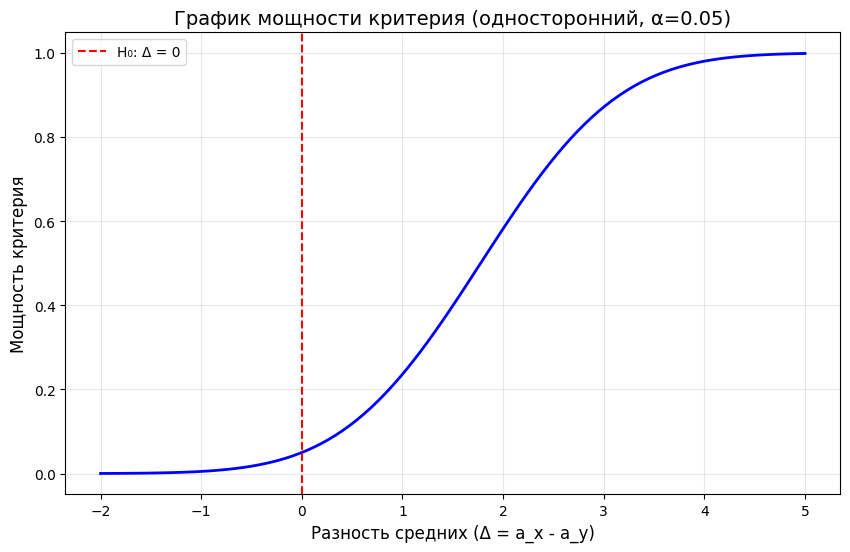

In [ ]:
x = np.array([-1.11, -6.10, 2.42])
y = np.array([-2.29, -2.91])
n, m = len(x), len(y)
sigma_x3, sigma_y2 = 2, 1 
alpha = 0.05

delta_range = np.linspace(-2, 5, 100)

# Критическое значение z_{1-alpha}
z_crit = stats.norm.ppf(1 - alpha)

# Функция мощности
def power(delta):
    se = np.sqrt(sigma_x3/n + sigma_y2/m)
    return 1 - stats.norm.cdf(z_crit - delta / se)

power_values = [power(delta) for delta in delta_range]

plt.figure(figsize=(10, 6))
plt.plot(delta_range, power_values, color='blue', linewidth=2)
plt.axvline(x=0, color='red', linestyle='--', label='H₀: Δ = 0')
plt.xlabel('Разность средних (Δ = a_x - a_y)', fontsize=12)
plt.ylabel('Мощность критерия', fontsize=12)
plt.title('График мощности критерия (односторонний, α=0.05)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()